In [1]:
# -*- coding: utf-8 -*-
# カーネル主成分分析
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets


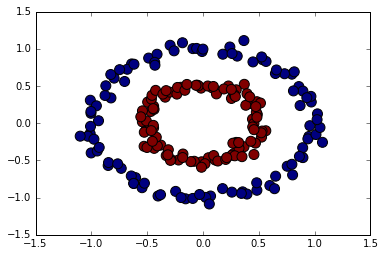

In [2]:
# サンプルデータ
X, y = datasets.samples_generator.make_circles(n_samples=200, factor=.5, noise=.05)
plt.scatter(X[:,0],X[:,1], s = 100, c = y)

In [3]:
# カーネルクラスを定義
class Kernel:
    def __init__(self, x_sample, kernel_function):
        '''
        x_sample : MxN matrix, M is number of sample, N is dimension of x
        '''
        self.x_sample = x_sample
        self.kernel_function = kernel_function
        
    def __call__(self, x):
        return self.kernel_function(x, self.x_sample)
        
    def gram_matrix(self):
        n = self.x_sample.shape[0]
        gram = np.zeros((n, n))
        
        for i in range(n):
            for j in range(i, n):
                value = self.kernel_function(\
                    self.x_sample[i], 
                    self.x_sample[j])
                gram[i, j] = value
                gram[j, i] = value
        return gram


In [4]:
# カーネルクラスのオブジェクト
beta = 1
kernel_function = lambda x, y: beta * np.exp(-beta**2 * np.linalg.norm(x - y))
kernel = Kernel(X, kernel_function)

# グラム行列と固有値問題
gram_matrix = kernel.gram_matrix()
n = X.shape[0]
J = np.identity(n) - 1 / n * np.ones((n,n))
eigen, v = np.linalg.eig(np.dot(J, gram_matrix))

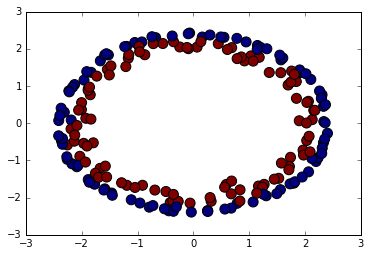

In [5]:
# カーネル主成分分析の第一主成分と第二主成分でプロット
i_inversely_sorted = eigen.argsort()
x1 = np.dot(v[:, i_inversely_sorted[-1]], gram_matrix)
x2 = np.dot(v[:, i_inversely_sorted[-2]], gram_matrix)
plt.scatter(x1, x2, s = 100, c = y)

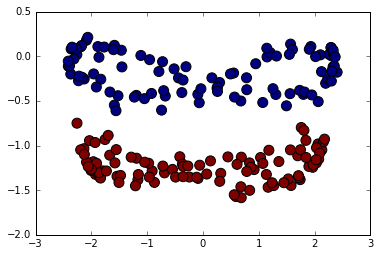

In [6]:
# カーネル主成分分析の第一主成分と第三主成分でプロット
i_inversely_sorted = eigen.argsort()
x3 = np.dot(v[:, i_inversely_sorted[-3]], gram_matrix)
plt.scatter(x1, x3, s = 100, c = y)

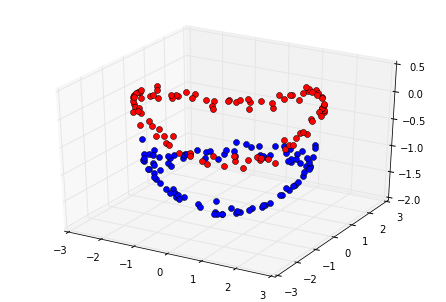

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x1[y==1], x2[y==1], x3[y==1], "o", color="blue")
ax.plot(x1[y==0], x2[y==0], x3[y==0], "o", color="red")
# ax.plot(x1, x2, x3, "o", color=y)
